In [2]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpl

In [3]:
#import raw dataset
import io

df = pd.read_csv(r"C:\Users\eklas\Desktop\CSV\bike_hour.csv")
pd.set_option('display.max_rows', 10)
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
#explanation of cols:
#- instant: record index
# 	- dteday : date
# 	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
# 	- yr : year (0: 2011, 1:2012)
# 	- mnth : month (1 to 12)
# 	- hr : hour (0 to 23)
# 	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
# 	- weekday : day of the week
# 	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# weathersit : 
# 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 		- 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
# 	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
# 	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
# 	- hum: Normalized humidity. The values are divided to 100 (max)
# 	- windspeed: Normalized wind speed. The values are divided to 67 (max)
# 	- casual: count of casual users
# 	- registered: count of registered users
# 	- cnt: count of total rental bikes including both casual and registered

In [6]:
#goal of project: 
#Regression: Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
#I will use a binary predictor (median of hourly bike rental) as my cutoff predictor; perhaps I will return to this
#when I'm able to handle this more sophisticated analysis. Eventually I would like to be able to predict the hourly
#rental count based on environmental factors.

In [4]:
#let's explore our data.
#start with col names:
cols = df.columns.tolist()
cols

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [4]:
#rename some columns
df2=df.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'hr':'hour','temp':'temp_c', 'atemp':'feeltemp_c', 'hum':'humid', 'cnt':'count'})
df2.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp_c,feeltemp_c,humid,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
#can drop the 'instant' col

df2.drop(['instant'], inplace = True, axis = 1)
df2.head()

,date,season,year,month,hour,holiday,weekday,workingday,precip_hr,weathersit,temp_c,feeltemp_c,humid,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
#shape of the data
df2.shape

(17379, 16)

In [11]:
df2.info()
#huzzah, whole lotta non-nulls. Ints and floats, glory be

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
date          17379 non-null object
season        17379 non-null int64
year          17379 non-null int64
month         17379 non-null int64
hour          17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp_c        17379 non-null float64
feeltemp_c    17379 non-null float64
humid         17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
count         17379 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [12]:
#double check that null situation....
df2.isnull().sum()/df2.shape[0]

date          0.0
season        0.0
year          0.0
month         0.0
hour          0.0
             ... 
humid         0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
Length: 16, dtype: float64

In [13]:
df2['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [14]:
df2['holiday'].unique()

array([0, 1], dtype=int64)

In [15]:
df2['workingday'].unique()

array([0, 1], dtype=int64)

In [16]:
df2['weathersit'].unique()

array([1, 2, 3, 4], dtype=int64)

In [5]:
#going to separate the weathersit into 2 groups: clear-misty(1), and light-heavy precip(2)

def precipit(value):
    if value < 3: 
        return 0
    else: 
        return 1

In [8]:
#Now, to use the precip function on the dataset, .
#Then we will create a new col that aggregates these values and tells you how many precip days and hours there were.

precip_hr = df2.loc[:, 'weathersit'].map(precipit)
df2.insert(9, 'precip_hr', precip_hr)
#if weathersit <= 2, returns 0; else, returns 1

df2

,date,season,year,month,hour,holiday,weekday,workingday,precip_hr,weathersit,temp_c,feeltemp_c,humid,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,0,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,0,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,0,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,0,1,0.26,0.2727,0.56,0.1343,13,48,61


In [9]:
#Descriptive analysis

df2[['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weathersit', 'precip_hr', 'temp_c', 'feeltemp_c', 
   'humid', 'windspeed', 'count']].describe()

,season,year,month,hour,holiday,weekday,workingday,weathersit,precip_hr,temp_c,feeltemp_c,humid,windspeed,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.081823,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.274103,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [119]:
#Average of weathersit was 1.4, meaning, avg was a clear-misty day.
#precip_hr avg was .08, indicating that people were much more apt to ride the bikes when it was not precipitating out 

#Normalized temperature (C) average was 0.50 with a std of 0.19, max temperature of 1.
#Multiply by 41, avg temperature would be 20.5C (assuming??)

#Average Feeltemp was .48, or 19.5 C

#average hourly causal rider was 35.6, average registered rider was 153.7, average count was 189.5.

#average hour was 11.5, so around 1130 AM. 

In [10]:
#What's the relationship between season and count? 
#season (1:spring, 2:summer, 3:fall, 4:winter)

count_season = df2.groupby('season')['count'].mean()
count_season

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64

In [194]:
#double-check my precip. 
#precip: (weathersit ==1 | weathersit == 2) = 0 (no precip); (weathersit == 3 | weathersit == 4) = 1 (precip)

count_precip = df2.groupby('precip_hr')['count'].mean()
count_precip

precip_hr
0    196.410666
1    111.500703
Name: count, dtype: float64

In [195]:
#How about weathersit and count?
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

count_weathersit = df2.groupby('weathersit')['count'].mean()
count_weathersit

weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: count, dtype: float64

In [196]:
#weekday and count

count_weekday = df2.groupby('weekday')['count'].mean()
count_weekday

weekday
0    177.468825
1    183.744655
2    191.238891
3    191.130505
4    196.436665
5    196.135907
6    190.209793
Name: count, dtype: float64

In [11]:
#hour and count

hourly_count = df2.groupby('hour')['count'].mean()
pd.set_option('display.max_rows', 24) #want to see all 24 hours
hourly_count

hour
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: count, dtype: float64

In [286]:
#Eyeballing it, like 5pm is the most popular, then 6pm, then 8AM.

from statistics import mode
hourly_count = #find mode of hour count

SyntaxError: invalid syntax (<ipython-input-286-867e22d64799>, line 2)

In [150]:
#sum of all the casual, registered, and total bike rental counts

counts=df2[['casual', 'registered', 'count']]
counts.sum(axis=0, skipna=True)

casual         620017
registered    2672662
count         3292679
dtype: int64

In [10]:
def seasons (x):
    if x == 1:
        return 'Spring'
    elif x == 2:
        return 'Fall'
    elif x == 3:
        return 'Winter'
    else:
        return 'Summer'

Text(0.5, 1.0, 'Hourly Usage by Season')

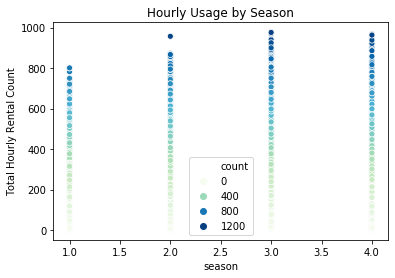

In [48]:
#scatterplot, count and season
sns.scatterplot(x='season', y ='count', hue='count', palette='GnBu', data=df2)
plt.legend(loc= 'best')
plt.ylabel("Total Hourly Rental Count")
plt.title("Hourly Usage by Season")
#hourly usage count by season
#need to change x label 1,2,3,4 = Spring, Summer, Fall, Winter

Text(0.5, 0, 'Military Time')

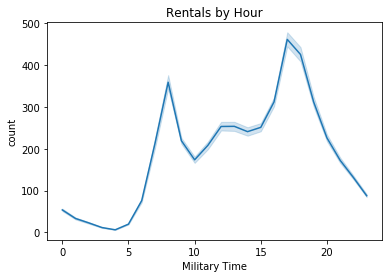

In [11]:
sns.lineplot(x='hour', y='count', data=df2)
plt.title('Rentals by Hour')
plt.xlabel('Military Time')
#Hourly rentals
#Looks pretty bimodal, peaking in the morning and then bigger peak early evening.

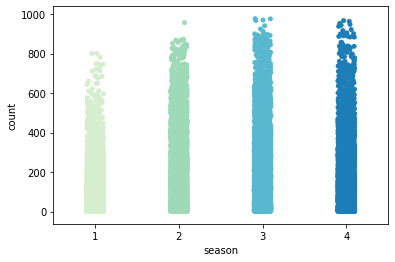

In [84]:
#1.spring has the lowest, 2 summer, 3 fall has highest, 4 winter has lowest. 

sns.stripplot(x='season', y='count', palette='GnBu', data=df2)

Text(0.5, 0, 'Normalized temperature, Celcius')

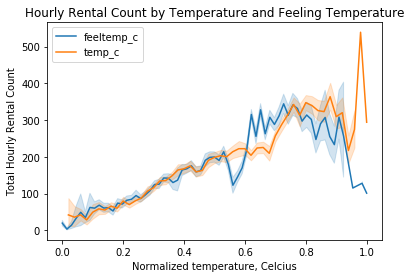

In [77]:
sns.lineplot(x='feeltemp_c', y='count', data=df2)
sns.lineplot(x='temp_c', y='count', data=df2)

plt.legend(['feeltemp_c','temp_c'], loc='upper left')
plt.title("Hourly Rental Count by Temperature and Feeling Temperature")
plt.ylabel("Total Hourly Rental Count")
plt.xlabel("Normalized temperature, Celcius")

Text(0.5, 1.0, 'Hourly Count by Working Day')

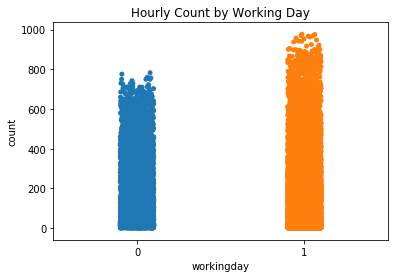

In [82]:
sns.stripplot(x='workingday', y='count', data=df2)
plt.title("Hourly Count by Working Day")

Text(0.5, 0, 'Normalized Humidity, Celcius')

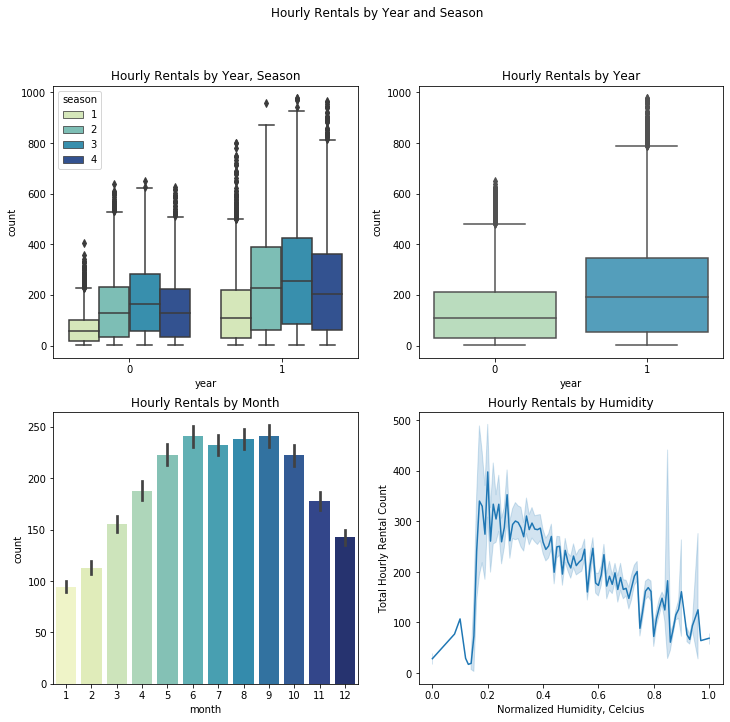

In [90]:
f, axes= plt.subplots(2, 2, figsize=(12,11), facecolor='white')
f.suptitle('Hourly Rentals by Year and Season')

ax1 = sns.boxplot(x='year',  y='count', palette='GnBu', data= df2, ax=axes[0,1])
ax1.title.set_text('Hourly Rentals by Year')
plt.ylabel("Hourly Count")

ax2 = sns.boxplot(x='year', y='count', hue='season', palette='YlGnBu', data=df2, ax=axes[0,0])
ax2.title.set_text("Hourly Rentals by Year, Season")
plt.ylabel("Hourly Count")
#don't know how to remove the bottom 2 without breaking it, add sumfin nice? :\

ax3= sns.barplot(x='month', y='count', palette='YlGnBu', data=df2, ax=axes[1,0])
ax3.title.set_text("Hourly Rentals by Month")
plt.ylabel("Hourly Count")

ax4=sns.lineplot(x='humid', y='count', palette='GnBu', data=df2, ax=axes[1,1])
ax4.title.set_text("Hourly Rentals by Humidity")
plt.ylabel("Total Hourly Rental Count")
plt.xlabel("Normalized Humidity, Celcius")

#need to make the x-axis better

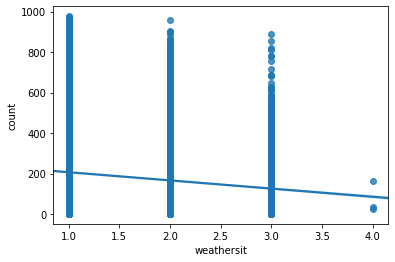

In [59]:
#barplot, count and weathersit
sns.regplot(df2['weathersit'],df2['count'])
# sns.scatterplot(x='weathersit', y ='count', palette='GnBu', data=df2)
#hm, I got the line of best fit, but it looks shitty. Have to come back to this.

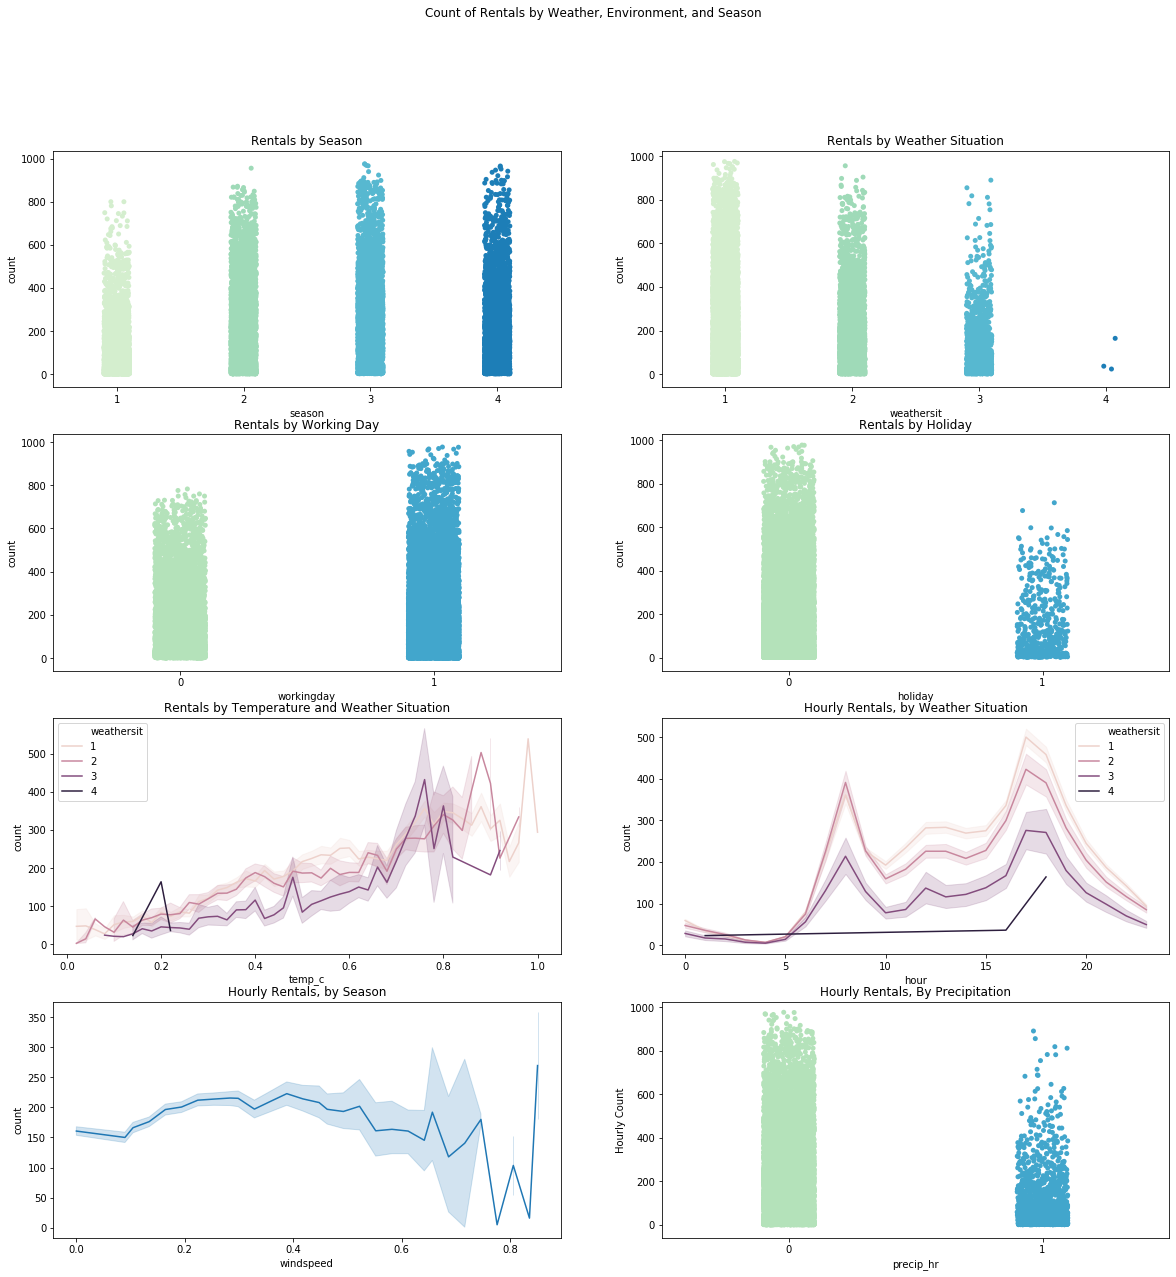

In [133]:
# count rentals  
# trying to make a nice array of graphs

# # select columns and create df that contains only 
rentals = df2[['season', 'weathersit', 'workingday','precip_hr', 'holiday','weekday', 'hour', 'count']]

f, axes= plt.subplots(4, 2, figsize=(20,20), facecolor='white')
f.suptitle('Count of Rentals by Weather, Environment, and Season')

#to give some examples of different palettes, here's this.

ax1 = sns.stripplot(x='season', y='count', palette='GnBu', data= rentals, ax=axes[0,0])
ax1.title.set_text('Rentals by Season')
#  hue='precip_hr',
#barplot for ax 1 and 2 may be better... but stripplot looks hella nice

ax2 = sns.stripplot(x='weathersit',  y='count', palette='GnBu', data= rentals, ax=axes[0,1])
# plt.legend(['season'], loc='upper right')
ax2.title.set_text('Rentals by Weather Situation')
plt.ylabel("Hourly Count")

ax3 = sns.stripplot(x='workingday', y='count', palette='GnBu', data= rentals, ax=axes[1,0])
ax3.title.set_text('Rentals by Working Day')
plt.ylabel("Hourly Count")

ax4= sns.stripplot(x='holiday', y='count', palette="GnBu", data= rentals, ax=axes[1,1])
#ax4 = sns.lineplot(x='hr', y='count', palette='Blues', ax=axes[1,1])
ax4.title.set_text('Rentals by Holiday')
plt.ylabel("Hourly Count")

ax5 =sns.lineplot(x='temp_c', y='count', hue='weathersit', data=df2, ax=axes[2,0])
ax5.title.set_text('Rentals by Temperature and Weather Situation')
plt.ylabel("Hourly Count")

ax6 = sns.lineplot(x='hour', y='count', hue='weathersit', data=df2, ax=axes[2,1])
ax6.title.set_text('Hourly Rentals, by Weather Situation')
plt.ylabel("Hourly Count")

ax7 = sns.lineplot(x='windspeed', y='count', palette='GnBu', data=df2, ax=axes[3,0])
ax7.title.set_text('Hourly Rentals, by Season')
plt.ylabel("Hourly Count")
#1.spring has the lowest, 2 summer, 3 fall has highest, 4 winter has lowest. 

#barplot, count and weathersit
ax8 = sns.stripplot(x='precip_hr', y='count', palette='GnBu', data=df2, ax=axes[3,1])
ax8.title.set_text("Hourly Rentals, By Precipitation")
plt.ylabel("Hourly Count")
#yeah that looks about right. 0 = clear-misty, 1 = light-heavy rain/ice pellets. Lot more rentals when it's clear out.



plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)

plt.show()

In [23]:
df3 = df2.drop('registered', axis=1)

In [13]:
df2 = df2.drop('date', axis=1)

In [14]:
df2 = df2.drop('casual', axis=1)

In [16]:
df3.head()

,season,year,month,hour,holiday,weekday,workingday,precip_hr,weathersit,temp_c,feeltemp_c,humid,windspeed,count
0,1,0,1,0,0,6,0,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,0,1,0.24,0.2879,0.75,0.0,1


In [26]:
#Predictive Analysis
#Predictive model - first need to check for correlation in the dataset

result = df3.corr() #finds linear pearson correlation
result = result [result < 1] #to avoid correlating values with themselves (ie corr = 1)
df2.fillna('-')
result

,season,year,month,hour,holiday,weekday,workingday,precip_hr,weathersit,temp_c,feeltemp_c,humid,windspeed,count
season,NaN,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.012580,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.178056
year,-0.010742,NaN,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.031339,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.250495
month,0.830386,-0.010473,NaN,-0.005772,0.018430,0.010400,-0.003477,-0.004439,0.005400,0.201691,0.208096,0.164411,-0.135386,0.120638
hour,-0.006117,-0.003867,-0.005772,NaN,0.000479,-0.003498,0.002285,0.016958,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,NaN,-0.102088,-0.252471,-0.023750,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,-0.030927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
temp_c,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.063361,-0.102640,NaN,0.987672,-0.069881,-0.023125,0.404772
feeltemp_c,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.069339,-0.105563,0.987672,NaN,-0.051918,-0.062336,0.400929
humid,0.150625,-0.083546,0.164411,-0.276498,-0.010588,-0.037158,0.015688,0.310275,0.418130,-0.069881,-0.051918,NaN,-0.290105,-0.322911
windspeed,-0.149773,-0.008740,-0.135386,0.137252,0.003988,0.011502,-0.011830,0.070022,0.026226,-0.023125,-0.062336,-0.290105,NaN,0.093234


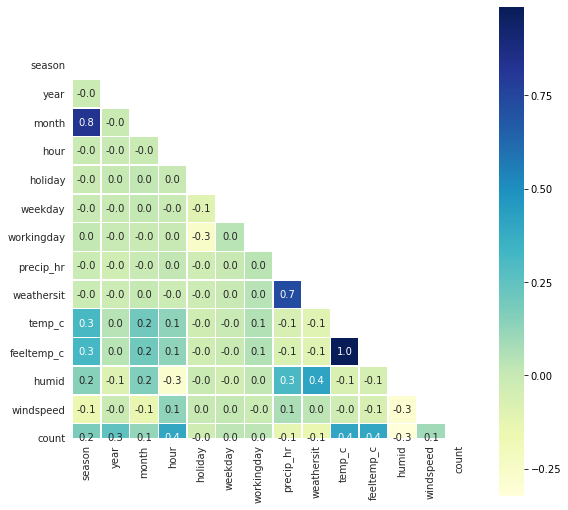

In [27]:
mask = np.full_like(result,0) #alternatively, can use np.zeros_like(result)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(result, cbar=True, square=True, annot=True, fmt= '.1f',
           xticklabels=True, yticklabels=True,
           cmap='YlGnBu', linewidths=.5, mask=mask, ax=ax)

In [17]:
#drop the 'count' col for machine learning, replace with  medcount (binary: 0= below median; 1=above med)
df3 = df2.drop('count', axis=1)

In [125]:
import sklearn

In [126]:
#build custom function to split the count into binary. Below median = 0, above median = 1
df2['count'].median()

142.0

In [28]:
def med(value):
    if value <= 142:
        return 0
    if value > 142:
        return 1

In [29]:
#Now, to use the medcount function on the dataset, .
#Then we will create a new col that aggregates these values and tells you whether a given hour rental was below or above the median.

medcount = df2.loc[:,'count'].map(med)
df3.insert(13, 'medcount', medcount)

In [30]:
#ok now drop 'count' col
df3.drop(['count'], inplace = True, axis = 1)
df3.head()

,season,year,month,hour,holiday,weekday,workingday,precip_hr,weathersit,temp_c,feeltemp_c,humid,windspeed,medcount
0,1,0,1,0,0,6,0,0,1,0.24,0.2879,0.81,0.0,0
1,1,0,1,1,0,6,0,0,1,0.22,0.2727,0.80,0.0,0
2,1,0,1,2,0,6,0,0,1,0.22,0.2727,0.80,0.0,0
3,1,0,1,3,0,6,0,0,1,0.24,0.2879,0.75,0.0,0
4,1,0,1,4,0,6,0,0,1,0.24,0.2879,0.75,0.0,0


Text(0.5, 1, 'Correlation')

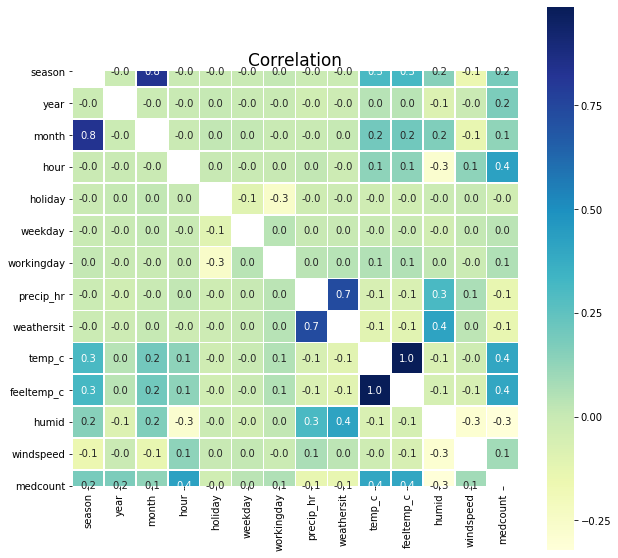

In [31]:
result = df3.corr() #finds linear pearson correlation
result = result [result < 1] #to avoid correlating values with themselves (ie corr = 1)
result
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(result, cbar = True, square = True, annot = True, fmt= '.1f',
               xticklabels=True, yticklabels= True,
               cmap = 'YlGnBu', linewidth = .5, ax=ax)
plt.title('Correlation', size=17)
#frig, why am I getting a squished top level ?
#hour, temp_c, and feeltemp_c have highest corr-- 0.4

In [32]:
# isolate Independent Var, X (precip_hr) and Dependent Var, Y (count) using pandas manipulation.

df3_X = df3.drop('medcount', axis=1)
df3_Y = df3['medcount']

In [33]:
#Build a decision tree:
#start by separating the training and test data.
#Tree models where the target variable can take a discrete set of values are called classification trees. 
#I will use Classifaction Tree in this case, because medount is binary
#Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. 
#Classification And Regression Tree (CART) is general term for this.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df3_X, df3_Y, test_size=.3, random_state=33)

In [34]:
#Information gain is used to decide which feature to split on at each step in building the tree. 
#Simplicity is best, so we want to keep our tree small. To do so, at each step we should 
#choose the split that results in the purest daughter nodes. 
#A commonly used measure of purity is called information. 
#For each node of the tree, the information value measures how much information a feature gives us about the class. 
#The split with the highest information gain will be taken as the first split and 
#the process will continue until all children nodes are pure, or until the information gain is 0.

#Decision tree classifier and use the fit method to train the model
from sklearn import tree
classif = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None, min_samples_leaf=5)

In [35]:
classif = classif.fit(X_train, Y_train)
classif

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
#OK, now to build the decision tree and get accuracy.

from sklearn import metrics
def measure_perf(df3_X, df3_Y, classif, show_accuracy=True,
                show_classification_report=True, show_confusion_matrix=True):
    Y_pred =classif.predict(df3_X)
    if show_accuracy:
        print('Accuracy:{0:.3f}'.format(
                metrics.accuracy_score(df3_Y, Y_pred)
                ),"\n")
        if show_classification_report:
            print("Classification report")
            print(metrics.classification_report(df3_Y, Y_pred), "\n")
        if show_confusion_matrix:
            print("Confusion matrix")
            print(metrics.confusion_matrix(df3_Y, Y_pred),"\n")

In [37]:
#now, to measure performance

measure_perf(X_train, Y_train, classif, 
            show_classification_report = True, show_confusion_matrix = True)

Accuracy:0.960 

Classification report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6060
           1       0.96      0.96      0.96      6105

    accuracy                           0.96     12165
   macro avg       0.96      0.96      0.96     12165
weighted avg       0.96      0.96      0.96     12165
 

Confusion matrix
[[5812  248]
 [ 244 5861]] 



In [ ]:
# Accuracy = TP+TN/TP+FP+FN+TN
#Precision: the ratio of correctly predicted positive observations to the total predicted positive observations. 
#So, of all predicted above medcount, how many were actually above medcount?

#High precision relates to the low false positive rate. 

#f1 score is pretty high, 0.96
#F1 score - F1 Score takes both false pos and false negatives into account; is the weighted average of Precision and Recall. 
#F1 is usually more useful than accuracy, especially if you have an uneven class distribution.
#Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 
#In my case, f1-score is .96.


In [38]:
# Y_pred = classif.predict(df3_X)
# metrics.f1_score(Y_test, Y_pred, average='weighted')  #something to sort out.
df3.head()

,season,year,month,hour,holiday,weekday,workingday,precip_hr,weathersit,temp_c,feeltemp_c,humid,windspeed,medcount
0,1,0,1,0,0,6,0,0,1,0.24,0.2879,0.81,0.0,0
1,1,0,1,1,0,6,0,0,1,0.22,0.2727,0.80,0.0,0
2,1,0,1,2,0,6,0,0,1,0.22,0.2727,0.80,0.0,0
3,1,0,1,3,0,6,0,0,1,0.24,0.2879,0.75,0.0,0
4,1,0,1,4,0,6,0,0,1,0.24,0.2879,0.75,0.0,0


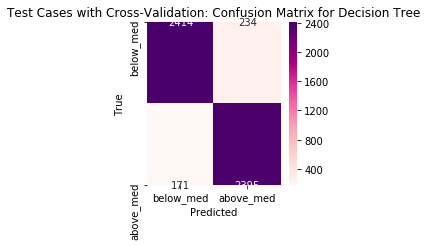

In [43]:
#Test case
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(3,3))
cm = confusion_matrix(Y_test,classif.predict(X_test))
sns.heatmap(cm,annot=True, cmap="RdPu", fmt="d", 
            xticklabels = ['below_med', 'above_med'], 
            yticklabels = ['below_med', 'above_med'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Test Cases with Cross-Validation: Confusion Matrix for Decision Tree")
plt.show()

##again, why am i getting wonky sizing

In [ ]:
# #true negative = 2414

# true positive = 2395

# False positve = 171

# False negative = 234

In [44]:
#Now, for cross-validation. 
# select feature selection based on the recommendation from feature selection methods
Feature_fs = df3[['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'precip_hr', 'weathersit',
                  'temp_c', 'feeltemp_c', 'humid', 'windspeed', 'medcount']]
                 
X_fs = Feature_fs.drop('medcount', axis=1)
y_fs = df3['medcount']

In [45]:
#build a classifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from random import randint
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [46]:
from sklearn.model_selection import RandomizedSearchCV
# random_search = RandomizedSearchCV()
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import ParameterGrid

rfr = RandomForestRegressor(n_estimators=20, random_state=1111)
scorer = make_scorer(mean_absolute_error)
# np.ndarray=format(max_features)
random_search =\
GridSearchCV(estimator=rfr,
param_grid= {},
cv=5)
random_search.fit(df3_X, df3_Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=20, n_jobs=None,
                                             oob_score=False, random_state=1111,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [47]:
# Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df3_X, df3_Y)
print(lr.coef_, lr.intercept_)

[ 0.05309504  0.1495209   0.00163886  0.02363989 -0.0432005   0.00720468
  0.04470453 -0.19637123  0.05648878 -0.03915612  0.92111923 -0.54826636
  0.12334991] -0.2064197128207465


In [154]:
df3.head()

,season,year,month,hour,holiday,weekday,workingday,weathersit,precip_hr,temp_c,feeltemp_c,humid,windspeed,medcount
0,1,0,1,0,0,6,0,1,0,0.24,0.2879,0.81,0.0,0
1,1,0,1,1,0,6,0,1,0,0.22,0.2727,0.80,0.0,0
2,1,0,1,2,0,6,0,1,0,0.22,0.2727,0.80,0.0,0
3,1,0,1,3,0,6,0,1,0,0.24,0.2879,0.75,0.0,0
4,1,0,1,4,0,6,0,1,0,0.24,0.2879,0.75,0.0,0


In [48]:
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                               random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                      penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(df3, df3.medcount)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

In [49]:
# The tree has an accuracy of 0.960 on the training set. It is susceptible to over-fitting, therefore, need to apply
#cross-validation, named k-fold cross-validation. 
#calculate chi-square metric between the expected variable and the observed and only select the maximum chi-squared values.
# do feature selection with:  1 filter based method, 1 wrapper based method, 1 Embedded
# ref:colab.research.google.com/drive/1qxyDpmAZ7RkJ1w0ga5Fw4mAGqboozyHs#scrollTo=5ZCLcbA6YFK2
#filter-based (chi-squared)
# calculate chi-square metric between the expected variable and the observed and only select the maximum chi-squared values.
# calculate the chi-square between the feature(x) and the target(y), and select the features with the best chi-square scores.

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  chi2
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(df3_X)
chi_selector = SelectKBest(chi2, k = 13) # default is k=10 but i want top 15
chi_selector.fit(X_norm, df3_Y)
chi_support = chi_selector.get_support()
chi_feature = df3_X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

13 selected features


In [50]:
# wrapper-based method
# Reccursive feature elimination - fits a model and removes the weakest features until specified number of feature is reached
import warnings
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category = ConvergenceWarning)
rfe_selector = RFE(estimator=LogisticRegression(solver='lbfgs'), n_features_to_select=18, step=10, verbose=5)
rfe_selector.fit(X_norm, df3_Y)
rfe_support = rfe_selector.get_support()
rfe_feature = df3_X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

13 selected features


In [51]:
#embedded
#lasso :selectFromModel

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(), max_features=13)
embeded_lr_selector.fit(X_norm, df3_Y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = df3_X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

4 selected features


In [58]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(df3_X, df3_Y)

pd.set_option('display.max_rows', 14) #expand the cols to see all cols
pd.DataFrame({'Columns':df3_X.columns, 'Importance':dt.feature_importances_}).sort_values(by='Importance', ascending=False)

,Columns,Importance
3,hour,0.529225
9,temp_c,0.135793
11,humid,0.060812
6,workingday,0.050127
5,weekday,0.039528
2,month,0.037949
1,year,0.037777
12,windspeed,0.032108
10,feeltemp_c,0.029704
0,season,0.020150


In [53]:
print(len(chi_support), len(rfe_support), len(embeded_lr_support))

13 13 13


In [54]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':df3_X.columns,'Chi-2':chi_support,'RFE':rfe_support,  'Logistics':embeded_lr_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Feature,Chi-2,RFE,Logistics,Total
1,temp_c,True,True,True,3
2,humid,True,True,True,3
3,hour,True,True,True,3
4,feeltemp_c,True,True,True,3
5,year,True,True,False,2
6,workingday,True,True,False,2
7,windspeed,True,True,False,2
8,weekday,True,True,False,2
9,weathersit,True,True,False,2
10,season,True,True,False,2


In [59]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time
from scipy.stats import randint

# select feature selection based on the recommendation from feature importance
Feature_fi = df3[['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'precip_hr', 'weathersit',
                  'temp_c', 'feeltemp_c', 'humid', 'windspeed', 'medcount']]
                 
X_fi = Feature_fi.drop('medcount', axis=1)
y_fi = df3['medcount']

#build a classifier
clf_fi = DecisionTreeClassifier()


# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


#specify parameters and distributions to sample from 
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
#run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(clf_fi, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv = 10)

start = time()
random_search.fit(X_fi, y_fi)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 16.81 seconds for 50 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.776 (std: 0.095)
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 6}

Model with rank: 2
Mean validation score: 0.776 (std: 0.130)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 2}

Model with rank: 3
Mean validation score: 0.745 (std: 0.137)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 1}

Model with rank: 4
Mean validation score: 0.724 (std: 0.154)
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1}

Model with rank: 5
Mean validation score: 0.714 (std: 0.158)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 5}



In [60]:
# fkn brilliant, now let's test the best paramaters
print("\n\n-- Testing best parameters [Random]...")

dt_fi = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 8, min_samples_split = 2, max_leaf_nodes= 5, 
                                     random_state=0)
X_train1, X_test1, y_train1,y_test1 = train_test_split(X_fi,y_fi, test_size=0.25, random_state = 33)
dt_fi.fit(X_train1, y_train1)
y_pred1 = dt_fi.predict(X_test1)

print("Accuracy: {:.3f}", metrics.accuracy_score(y_pred1, y_test1))

scores_cv_fi = cross_val_score(dt_fi, X_fi, y_fi, cv=10)
print("mean: {:.3f} (std: {:.3f})".format(scores_cv_fi.mean(),
                                          scores_cv_fi.std()),
                                          end="\n\n" )



-- Testing best parameters [Random]...
Accuracy: {:.3f} 0.7673187571921749
mean: 0.632 (std: 0.178)



In [147]:
from sklearn import metrics
def measure_performance(df3_X,df3_Y,clf, show_accuracy=True,
show_classification_report=True, show_confusion_matrix=True):
    Y_pred=clf.predict(df3_X)
    if show_accuracy:
        print ('Accuracy:{0:.3f}'.format(
            metrics.accuracy_score(df3_Y, Y_pred)
        ),"\n")
        if show_classification_report:
            print( "Classification report")
            print( metrics.classification_report(df3_Y,Y_pred),"\n")
            if show_confusion_matrix:
                print ("Confusion matrix")
                print (metrics.confusion_matrix(df3_Y,Y_pred),"\n")

In [148]:
#let's measure the performance of that sucker
#F1 of .80 is pretty good

measure_performance(X_train1,y_train1,dt_fi,
 show_classification_report = True, show_confusion_matrix=True)

Accuracy:0.778 

Classification report
              precision    recall  f1-score   support

           0       0.85      0.67      0.75      6499
           1       0.73      0.89      0.80      6535

    accuracy                           0.78     13034
   macro avg       0.79      0.78      0.78     13034
weighted avg       0.79      0.78      0.78     13034
 

Confusion matrix
[[4341 2158]
 [ 737 5798]] 



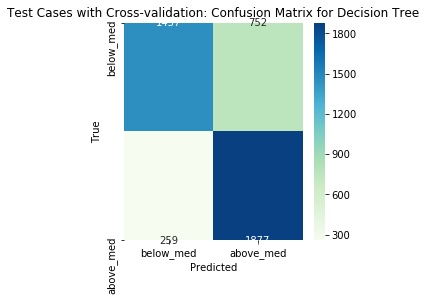

In [149]:
#Test case only confusion matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(4,4))
cm =confusion_matrix(y_test1, dt_fi.predict(X_test1))
sns.heatmap(cm,annot=True, cmap="GnBu", fmt="d", 
            xticklabels = ['below_med', 'above_med'], 
            yticklabels = ['below_med', 'above_med'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Test Cases with Cross-validation: Confusion Matrix for Decision Tree");

[[2641    2]
 [  10 2561]]


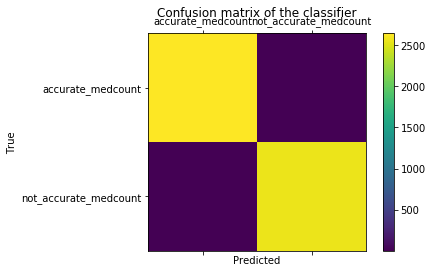

In [154]:
# from sklearn.metrics import confusion_matrix


Y_pred = clf.predict(X_test) 
labels = ['accurate_medcount', 'not_accurate_medcount']
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [82]:
#Pricision tree with feature selection and parameter tuning 
#select feature selection based on the recommendation from feature selection methods
Feature_fs = df3[['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'precip_hr', 'weathersit',
                  'temp_c', 'feeltemp_c', 'humid', 'windspeed', 'medcount']]
                 
X_fs = Feature_fs.drop('medcount', axis=1)
y_fs = df3['medcount']


#build a classifier
clf_fs = DecisionTreeClassifier()


# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


#specify parameters and distributions to sample from 
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]}       
#run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(clf_fs, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X_fs, y_fs)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 8.99 seconds for 50 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.749 (std: 0.106)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 7}

Model with rank: 2
Mean validation score: 0.746 (std: 0.107)
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7}

Model with rank: 3
Mean validation score: 0.746 (std: 0.060)
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 4}

Model with rank: 4
Mean validation score: 0.743 (std: 0.110)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 2}

Model with rank: 5
Mean validation score: 0.741 (std: 0.117)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1}



In [88]:
#ok, now test the best params
# test the best parameters
print("\n\n-- Testing best parameters [Random]...")

dt_fs = DecisionTreeClassifier(criterion= 'gini', max_depth= 11, min_samples_split = 5,
                                     max_features= 7, min_samples_leaf= 2, max_leaf_nodes = 5, random_state=33)

X_train2, X_test2, y_train2,y_test2 = train_test_split(X_fs,y_fs, test_size=0.25, random_state = 33)
#fit it
dt_fs.fit(X_train2, y_train2)
y_pred2 = dt_fs.predict(X_test2)


print("Accuracy: {:.3f}", metrics.accuracy_score(y_pred2, y_test2))

scores_cv_fs = cross_val_score(dt_fs, X_fs , y_fs, cv=10)
print("mean: {:.3f} (std: {:.3f})".format(scores_cv_fs.mean(),
                                          scores_cv_fs.std()),
                                          end="\n\n" )



-- Testing best parameters [Random]...
Accuracy: {:.3f} 0.8165707710011507
mean: 0.696 (std: 0.184)



In [86]:
measure_performance(X_train,Y_train,dt_fs,
 show_classification_report = True, show_confusion_matrix=True)
#f1 is 0.83

Accuracy:0.491 

Classification report
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      6060
           1       0.49      0.48      0.48      6105

    accuracy                           0.49     12165
   macro avg       0.49      0.49      0.49     12165
weighted avg       0.49      0.49      0.49     12165
 

Confusion matrix
[[3063 2997]
 [3197 2908]] 



In [ ]:
#ROC curve (Receiver Optical Curve) is a graphical plot that illustrates the diagnostic ability of a binary classifier system 
#as its discrimination threshold is varied. 
#The ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings.

In [146]:
# Printing the dataset shape 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
def importdata():
    df3=df3
    print ("Dataset Length: ", len(df3)) 
    print ("Dataset Shape: ", df3.shape) 
      
# Printing the dataset obseravtions 
    print ("Dataset: ",df3.head()) 
    return df3
  
# Function to split the dataset 
def splitdataset(df3): 
  
    # Separating the target variable 
    df3_X = df3.values[:, 1:14] 
    df3_Y = df3.values[:, 0] 
  
    # Splitting the dataset into train and test 
    X_train, X_test, Y_train, Y_test = train_test_split(df3_X, df3_Y, test_size = 0.3, random_state = 100) 

    return df3_X, df3_Y, X_train, X_test, Y_train, Y_test


# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, Y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, Y_train) 
    return clf_gini

# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, Y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, Y_train) 
    return clf_entropy 
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    Y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(Y_pred) 
    return Y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(Y_test, Y_pred): 
      
    print("Confusion Matrix: ", 
    confusion_matrix(Y_test, Y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(Y_test,Y_pred)*100) 
      
    print("Report : ", 
    classification_report(Y_test, Y_pred)) 

# Driver code 
def main(): 
      
    # Building Phase 
    data = df3 
    df3_X, df3_Y, X_train, X_test, Y_train, Y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, Y_train) 
    clf_entropy = train_using_entropy(X_train, X_test, Y_train) 
      
    # Operational Phase
    #Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified
    print("Results Using Gini Index:") 
#      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(Y_test, y_pred_gini) 
      
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(Y_test, y_pred_entropy) 
      
      
# Calling main function 
if __name__=="__main__": 
    main() 
    
    ###hm, this looks odd....

Results Using Gini Index:
Predicted values:
[3. 3. 4. ... 1. 2. 4.]
Confusion Matrix:  [[1174    0    0  152]
 [ 147 1166    0    0]
 [   0  146 1172    0]
 [   0    0  105 1152]]
Accuracy :  89.45147679324894
Report :                precision    recall  f1-score   support

         1.0       0.89      0.89      0.89      1326
         2.0       0.89      0.89      0.89      1313
         3.0       0.92      0.89      0.90      1318
         4.0       0.88      0.92      0.90      1257

    accuracy                           0.89      5214
   macro avg       0.89      0.89      0.89      5214
weighted avg       0.89      0.89      0.89      5214

Results Using Entropy:
Predicted values:
[3. 3. 4. ... 1. 2. 4.]
Confusion Matrix:  [[1174    0    0  152]
 [ 147 1166    0    0]
 [   0  146 1172    0]
 [   0    0  105 1152]]
Accuracy :  89.45147679324894
Report :                precision    recall  f1-score   support

         1.0       0.89      0.89      0.89      1326
         2.0       

In [155]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, df3_X, df3_Y)
print(scores.mean())

classifier = clf.fit(df3_X, df3_Y)
predictions = classifier.predict_proba(X_test)
print(predictions)

0.5885944151468239
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


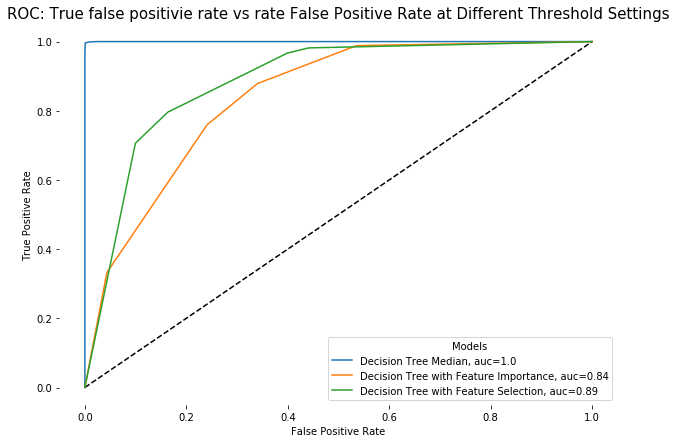

In [156]:
#Plot the ROC curve
# false positive rate, fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 

#auc = area under the curve

from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.utils import shuffle
import numpy as np

y_pred_DT_Basic = classifier.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  y_pred_DT_Basic)
auc1 = metrics.roc_auc_score(Y_test, y_pred_DT_Basic)

y_pred_DT_fi = dt_fi.predict_proba(X_test1)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test1,  y_pred_DT_fi)
auc2 = metrics.roc_auc_score(y_test1,y_pred_DT_fi)

y_pred_DT_fs = dt_fs.predict_proba(X_test2)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test2,  y_pred_DT_fs)
auc3 = metrics.roc_auc_score(y_test2, y_pred_DT_fs)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Decision Tree Median, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree with Feature Importance, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Decision Tree with Feature Selection, auc="+str(round(auc3,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: True false positivie rate vs rate False Positive Rate at Different Threshold Settings', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)